In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import underworld as uw
import glucifer
import numpy as np
import slippy2 as sp


In [77]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (128,64), 
                                 minCoord    = (-1., 0.), 
                                 maxCoord    = (1., 1.))


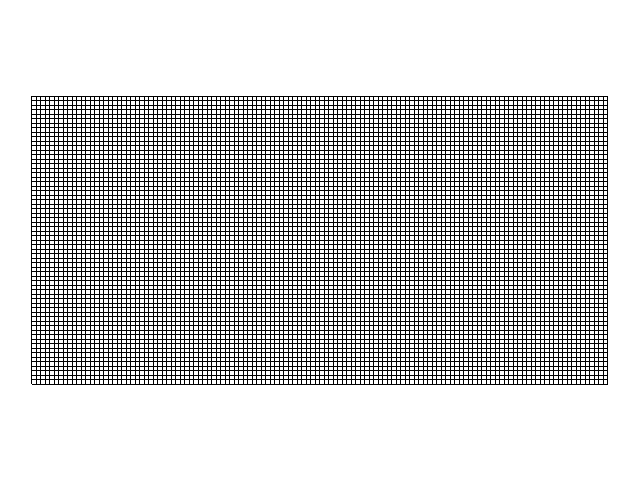

In [78]:
figMesh = glucifer.Figure(antialias=1)
#figMesh.append( glucifer.objects.Mesh(mesh.subMesh, nodeNumbers=True) )
figMesh.append( glucifer.objects.Mesh(mesh) )
figMesh.show()

In [79]:
def mesh_min_max(mesh, axis='x'):
    if axis == "y":
        thisaxis = 1
    else:
        thisaxis = 0
    return np.diff(np.sort(np.unique(mesh.data[:,thisaxis]))).min(), \
    np.diff(np.sort(np.unique(mesh.data[:,thisaxis]))).max()

In [80]:
dxmin,dxmax = mesh_min_max(mesh, axis='x')
dymin,dymax = mesh_min_max(mesh, axis='y')
print(dxmin,dxmax,dymin,dymax)

(0.015625, 0.015625, 0.015625, 0.015625)


## Shiskin refinement

In [81]:
axis = 0
#print((mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis]))
#print(mesh.data_nodegId.shape)
xkeys, ykeys = sp.mesh_element_keys(mesh)

#print(xkeys.shape, ykeys.shape,)

In [82]:
testx = []
for index, coord in enumerate(mesh.data):
    testx.append(index)
    
    
    
print("unique mesh index: ", np.unique(testx).shape)

('unique mesh index: ', (8385,))


In [83]:
#X-Axis
mesh.reset()
axis = 0
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
third = edge_rest_lengths.shape[0]/3
deform_lengths[third:2*third] *= 0.50001 ##The matix can go singular when this is exactly 1.

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'x',norm = 'Min', constraints = "None")

Min
(128, 0.0078126562499999993, 1.6718815624999999, 0.48837209302325607)
('edges', 128)
-- iteration 0 --
| F( p_n ) |^2: 0.000299519120992
| p_n+1 - p_n |^2: 1.15089070244
-- iteration 1 --
| F( p_n ) |^2: 2.79747342953e-31
Min, Max element width: 
0.00781
0.01944


In [84]:
#Y-Axis
axis = 1
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)
third = edge_rest_lengths.shape[0]/3
deform_lengths = np.copy(edge_rest_lengths)
deform_lengths

deform_lengths[2*third:] *= 0.50001 ##The matix can go singular when this is exactly 1.
sp.deform_1d(deform_lengths, mesh, axis = 'y',norm = 'Min', constraints = "None")


Min
(64, 0.0078126562499999993, 0.82812843749999987, 0.52380952380952439)
('edges', 64)
-- iteration 0 --
| F( p_n ) |^2: 0.000219496339639
| p_n+1 - p_n |^2: 0.630524133437
-- iteration 1 --
| F( p_n ) |^2: 3.37970612585e-31
Min, Max element width: 
0.00781
0.01972



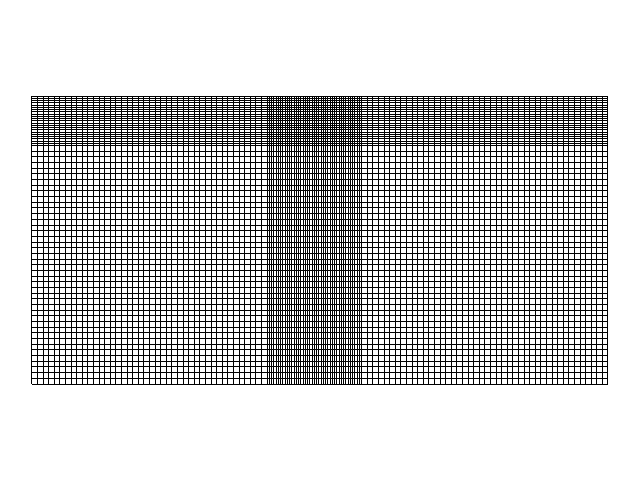

In [85]:
figMesh.save_database('test.gldb')
figMesh.show()

In [86]:
mesh_min_max(mesh, axis='x')

(0.0078126562500000496, 0.019440330668604733)

In [87]:
print(dxmin/mesh_min_max(mesh, axis='x')[0])
print(dymin/mesh_min_max(mesh, axis='y')[0])
#print(dxorig, dyorig)

1.9999600008
1.9999600008


## Linear refinement

In [88]:
deform_lengths

array([ 0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.00781266,  0.00781266,  0.00781266,
        0.00781266,  0.00781266,  0.00781266,  0.00781266,  0.00781266,
        0.00781266,  0.00781266,  0.00781266,  0.00781266,  0.00781266,
        0.00781266,  0.00781266,  0.00781266,  0.00781266,  0.00781266,
        0.00781266,  0.00781266,  0.00781266,  0.00781266])

In [89]:
#X-Axis
mesh.reset()
axis = 0
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  (abs(mesh.maxCoord[axis]) - abs(mesh.minCoord[axis]))/2.
el_reduction = 0.5001
dx = mesh.maxCoord[axis] - min_point

deform_lengths = deform_lengths - \
                                ((1.-el_reduction) *deform_lengths[0]) + \
                                abs((origcoords[1:] - min_point))*((0.5*deform_lengths[0])/dx)

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'x',norm = 'Min', constraints = "None")

Min
(128, 0.0078140624999999998, 1.5001999999999998, 0.99960000000000093)
('edges', 128)
-- iteration 0 --
| F( p_n ) |^2: 0.000125834660797
| p_n+1 - p_n |^2: 1.06884342198
-- iteration 1 --
| F( p_n ) |^2: 4.05552698039e-31
Min, Max element width: 
0.00781
0.02344


In [90]:
dx

1.0

In [91]:
#Y-Axis
axis = 1
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  (mesh.maxCoord[axis])
el_reduction = 0.5001
dx = mesh.maxCoord[axis]

deform_lengths = deform_lengths - \
                                ((1.-el_reduction)*deform_lengths[0]) + \
                                abs((origcoords[1:] - min_point))*((0.5*deform_lengths[0])/dx)

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'y',norm = 'Min', constraints = "None")

Min
(64, 0.0078140624999999998, 0.74619374999999988, 1.0313396825396834)
('edges', 64)
-- iteration 0 --
| F( p_n ) |^2: 0.000125895187329
| p_n+1 - p_n |^2: 0.550178754655
-- iteration 1 --
| F( p_n ) |^2: 3.77079027518e-31
Min, Max element width: 
0.00781
0.02344



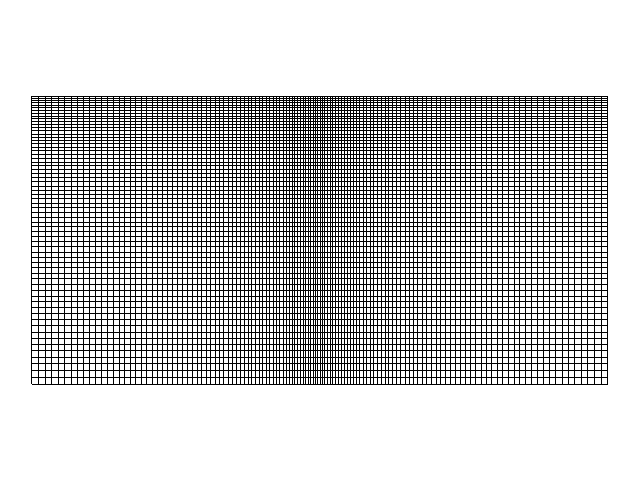

In [92]:
figMesh.save_database('test.gldb')
figMesh.show()

In [93]:
print(dxmin/mesh_min_max(mesh, axis='x')[0])
print(dymin/mesh_min_max(mesh, axis='y')[0])

1.99960007998
1.99960007998


## Cosine - spline

In [94]:
#X-Axis
mesh.reset()
axis = 0
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  (abs(mesh.maxCoord[axis]) - abs(mesh.minCoord[axis]))/2.
el_reduction = 0.5


deform_lengths = deform_lengths - (1.-el_reduction)*deform_lengths[0]*np.cos(np.pi*origcoords[1:])

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'x',norm = 'Min', constraints = "None")

Min
(128, 0.0078125, 2.0, 0.0)
('edges', 128)
-- iteration 0 --
| F( p_n ) |^2: 0.00013133377186
| p_n+1 - p_n |^2: 1.62341762333
-- iteration 1 --
| F( p_n ) |^2: 3.40191450552e-31
Min, Max element width: 
0.00781
0.02344


In [95]:
#Y-Axis

axis = 1
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  1.
el_reduction = 0.5



deform_lengths = deform_lengths - ((1.-el_reduction)*deform_lengths[0])*np.cos(abs(np.pi*(origcoords[1:] - min_point)))

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'y',norm = 'Min', constraints = "None")

Min
(64, 0.0078125, 0.9921875, 0.015873015873015872)
('edges', 64)
-- iteration 0 --
| F( p_n ) |^2: 0.000130708765088
| p_n+1 - p_n |^2: 0.836193083387
-- iteration 1 --
| F( p_n ) |^2: 3.48388689877e-31
Min, Max element width: 
0.00781
0.02368


In [96]:
print(edge_rest_lengths.min(), deform_lengths.min())

(0.015625, 0.0078125)



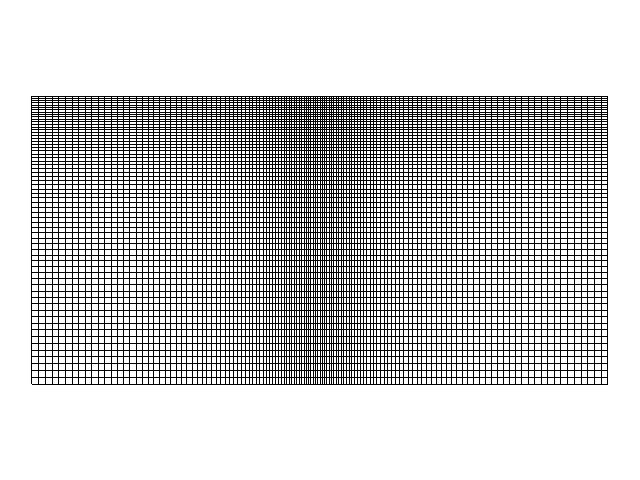

In [97]:
figMesh.save_database('test.gldb')
figMesh.show()

In [100]:
print(dxmin/mesh_min_max(mesh, axis='x')[0])
print(dymin/mesh_min_max(mesh, axis='y')[0])


2.0
2.0


## Gauss Refine

In [162]:
#X-Axis

def gauss(r,a):
    return np.exp(-r**2/a**2) 

a = 0.2


mesh.reset()
axis = 0
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  (abs(mesh.maxCoord[axis]) - abs(mesh.minCoord[axis]))/2.
el_reduction = 0.5001

deform_lengths = deform_lengths - (el_reduction*deform_lengths[0])*gauss((origcoords[1:] - min_point), a)

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'x',norm = 'Min', constraints = "None")

Min
(128, 0.0078109375000000002, 1.8227191658327169, 0.21542922018092941)
('edges', 128)
-- iteration 0 --
| F( p_n ) |^2: 1.44861375547e-05
| p_n+1 - p_n |^2: 0.288046168609
-- iteration 1 --
| F( p_n ) |^2: 4.57133013995e-31
Min, Max element width: 
0.00781
0.01731


In [163]:
#deform_lengths - (el_reduction*deform_lengths[0])*gauss((origcoords[1:] - min_point), a)

In [164]:
#Y-Axis

def gauss(r,a):
    return np.exp(-r**2/a**2) 

axis = 1
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  0.9801
el_reduction = 0.5001

deform_lengths = deform_lengths - (el_reduction*deform_lengths[0])*gauss((origcoords[1:] - min_point), a)

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'y',norm = 'Min', constraints = "None")

Min
(64, 0.0078145068564345766, 0.89758182653266405, 0.25768599949453369)
('edges', 64)
-- iteration 0 --
| F( p_n ) |^2: 6.83503991973e-05
| p_n+1 - p_n |^2: 0.194810611104
-- iteration 1 --
| F( p_n ) |^2: 2.19676384282e-31
Min, Max element width: 
0.00781
0.01764



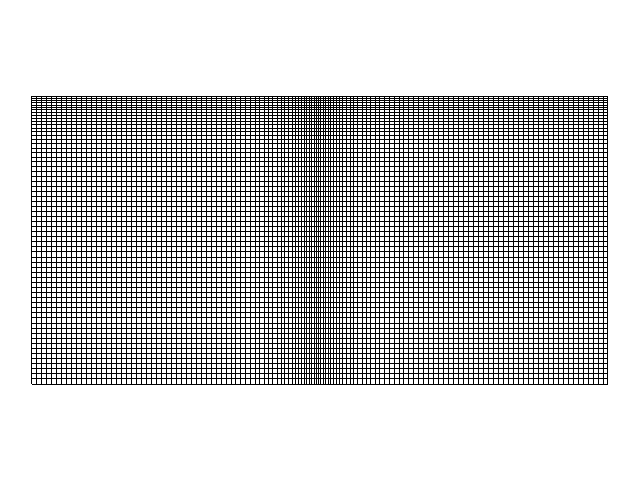

In [165]:
figMesh.save_database('test.gldb')
figMesh.show()

In [149]:
print(dxmin/mesh_min_max(mesh, axis='x')[0])
print(dymin/mesh_min_max(mesh, axis='y')[0])

2.00040008002
1.99675276344
